## 1. Opis problemu i cel projektu

Projekt polegał na eksploracji i analizie zbioru danych dotyczących pożyczek zaciąganych przez pewne osoby. Zbiór zawiera zarówno dane personalne pożyczkobiorców oraz parametry opisujące ich sytyację finansową, jak i cechy zaciągnaych przez nich pożczek.

Celem projektu było przeanalizowanie zbioru, w poszukiwaniu zmiennych, które pozwolną przeprowadzić klasyfikację binarną zmiennej odpowiedzialnej za niewypłacalność danej osoby. Należało także zaimplementować modele, które będą realizować zadanie klasyfikacji i porównać ich efektywność.

## 2. Użyty zbiór danych

W projekcie użyty został zbiór danych znaleziony na stronie *kaggle.com*, zawiera on w sobie dane zebrane przez *Grant Group Funding*, w ilości 87501 wierszy, gdzie każdy wiersz odpowiada jednej osobie i pożyczce zaciągniętej przez nią.

Zmienne, jakie zawiera w sobie zbiór prezentują się następująco:
* **ID** (liczba całkowita): Unikatowy identyfikator każdego wiersza
* **Asst_Reg** (liczba całkowita): Wartość wszystkich aktywów zarejestrowanych na nazwisko pożyczkobiorcy
* **GGGrade** (I - VII): Grant Group Grade, ocena nadana przez Grant Group Funding
* **Experience** (<1yr - >10yrs): Łączne doświadczenie zawodowe pożyczkobiorcy w latach
* **Validation** (ciąg znaków): Status walidacji pożyczkobiorcy
* **Yearly Income** (liczba zmiennoprzecinkowa) : Całkowity roczny dochód pożyczkobiorcy
* **Home Status** (ciąg znaków): Status zamieszkania pożyczkobiorcy
* **Unpaid 2 years** (liczba całkowita) : Liczba przypadków niewypłacalności Pożyczkobiorcy w ciągu ostatnich dwóch lat
* **Already Defaulted** (liczba całkowita): Liczba innych pożyczek, dla których pożyczkobiorca jest niewypłacalny
* **Designation** (ciąg znaków): Profesja pożyczkobiorcy
* **Debt to Income** (liczba zmiennoprzecinkowa) : Stosunek zadłużenia do dochodu
* **Postal Code** (liczba całkowita): Kod pocztowy pożyczkobiorcy
* **Lend Amount** (liczba zmiennoprzecinkowa): Całkowita kwota finansowana dla pożyczkobiorcy
* **Deprecatory Records** (liczba całkowita): Liczba rekordów deprecjonujących
* **Interest Charged** (liczba zmiennoprzecinkowa): Odsetki naliczane od kwoty całkowitej
* **Usage Rate** (liczba zmiennoprzecinkowa): Opłaty manipulacyjne od kwoty pożyczki
* **Inquiries** (liczba całkowita): Ilość zapytań o pożyczkę w ciągu ostatnich 6 miesięcy
* **Present Balance** (liczba zmiennoprzecinkowa): Bieżące saldo na rachunku pożyczkobiorcy
* **Gross Collection** (liczba zmiennoprzecinkowa): Kwota brutto płatna w drodze Ugody lub orzeczenia w odniesieniu do Roszczeń, z wyłączeniem wszelkich kosztów
* **Sub GGGrade** (liczba całkowita): Sub Grant Group Grade, pomniejsza ocena Grant Group Funding
* **File Status** (ciąg znaków): Status dokumentów dotyczących pożyczki
* **State** (ciąg znaków): Stan, w którym mieszka pożyczkobiorca
* **Account Open** (liczba całkowita): Łączna liczba otwartych rachunków w imieniu pożyczkobiorcy
* **Total Unpaid CL** (liczba zmiennoprzecinkowa): Niespłacone należności z tytułu wszystkich innych pożyczek
* **Duration** (3 years/5 years): Czas trwania pożyczki
* **Unpaid Amount** (liczba zmiennoprzecinkowa): Niespłacone saldo na karcie kredytowej
* **Reason** (ciąg znaków): Powód złożenia wniosku o pożyczkę
* **Claim Type** (I lub J): Typ roszczenia pożyczkobiorcy, I - Konto indywidualne, J - Konto wspólne
* **Due Fee** (liczba zmiennoprzecinkowa): Opłaty ponoszone w przypadku opóźnienia w spłacie kwoty pożyczki
* **Default** (1 lub 0): 1 - udzielenie pożyczki, 0 - brak udzielenia pożyczki

Faktem, na który warto zwrócić uwagę są brakujące lub nieprawidłowe wartości w niektórych kolumnach:
* **Yearly Income** - 5575 rekordów bez wartości zmiennej
* **Debt to Income** - 3489 rekordów bez wartości zmiennej oraz 25 rekordów z zerową wartością
* **Total Unpaid CL** - 4186 rekordów bez wartości zmiennej
* **Unpaid Amount** - 3456 rekordów bez wartości zmiennej oraz 181 rekordów z zerową wartością
* **Postal Code** - 1389 rekordów zawierających oznaczenie *NA*
  
W przypadku niniejszego projektu postanowiono dokonać imputacji w przypadku zmiennych **Yearly Income**, **Debt to Income** oraz **Total Unpaid CL**, zaś rekordy z błędną wartością zmiennych **Unpaid Amount** i **Postal Code** zostaną usunięte.

## 3. Użyte narzędzia
Do realizacji projektu użyte zostały następujące narzędzia:
- Python
- JetBrains Datalore
- Github
- numpy
- pandas
- scikit-learn
- matplotlib
- seaborn

In [8]:
!pip install dython
!pip install -U imbalanced-learn

You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

from dython.nominal import associations

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder, Normalizer

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.decomposition import FastICA
from sklearn.manifold import LocallyLinearEmbedding

from imblearn.over_sampling import SMOTE

In [7]:
sns.set(rc={'figure.figsize':(16,9)})
sns.set(font_scale=2)

## 4. Wczytanie i obróbka danych

In [9]:
loan_data = pd.read_csv('loan_data.csv')
loan_data

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Designation,...,File_Status,State,Account_Open,Total_Unpaid_CL,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee,Default
0,95074,421802,II,>10yrs,Vfied,633600.00,MORTGAGE,0,0,GLENDALE NISSAN,...,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,RENT,0,0,Business Teacher,...,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,III,<1yr,Source Verified,79200.00,RENT,0,0,driver,...,whole,Florida,7,15604.0,5 years,5637.87,major purchase,I,0.0,0
3,22591,197179,III,<1yr,Vfied,61600.00,RENT,0,0,AvePoint,...,fully paid,NewJersey,9,22410.0,3 years,15607.17,major purchase,I,0.0,1
4,125060,4646684,V,2yrs,Source Verified,68053.92,RENT,0,0,Lead Tester,...,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87495,120884,4535984,II,>10yrs,Not Vfied,75680.00,RENT,0,0,Engineer Support II,...,whole,MI,12,32702.0,3 years,10012.05,debt consolidation,I,0.0,0
87496,33259,2624710,IV,3yrs,Source Verified,90423.52,RENT,0,0,Dental Hygienist,...,whole,MA,23,32204.0,5 years,24921.54,debt consolidation,I,0.0,0
87497,102153,5966919,II,>10yrs,Source Verified,91520.00,MORTGAGE,0,0,Interface Coordinator,...,fully paid,CT,8,29050.0,3 years,14517.90,debt consolidation,I,0.0,0
87498,115343,2630667,III,1yrs,Source Verified,61600.00,MORTGAGE,0,0,PARTS CLERK,...,whole,PA,11,24900.0,3 years,8454.24,debt consolidation,I,0.0,0


In [15]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_columns = loan_data.select_dtypes(include=numerics).columns.tolist()
non_numeric_columns = loan_data.drop(numeric_columns, axis=1).columns.tolist()

Przed eksploracją i analizą należało odpowiednio przetworzyć zbiór, w celu eliminacji następujących problemów:
- Niespójne dane w kolumnie 'State'
- Brakujące lub niepoprawne dane
- Kodowanie danych kategorycznych

### 4.1 Niespójność kolumny 'State'

Patrząc na kolumnę 'State' opisującej Stan, w którym mieszka pożyczkobiorca, zauważyć można, że większość Stanów oznaczona jest przez ich kod nadany przez USPS (United States Postal Service), ale niektóre mają przypisaną pełną nazwę. W celu uspójnienia danych zamieniono pełne nazwy na ich skróconą wersję nadaną przez USPS.

In [10]:
print("Wartości występujące w kolumnie 'State':\n")

state_list = [state for state in loan_data.State.unique()]

for i in range(0, len(state_list), 5):
    print(f'{state_list[i: i + 5]}')

Wartości występujące w kolumnie 'State':

['California', 'NC', 'Florida', 'NewJersey', 'LA']
['TX', 'CT', 'MI', 'OR', 'AR']
['Newyork', 'MT', 'CO', 'Ohio', 'NM']
['MN', 'GA', 'WA', 'Maryland', 'AL']
['SC', 'PA', 'AZ', 'UT', 'MA']
['VA', 'IL', 'WI', 'NV', 'HI']
['RI', 'TN', 'OK', 'VT', 'IN']
['AK', 'MO', 'NE', 'NH', 'DC']
['WV', 'MS', 'KY', 'KS', 'DE']
['ND', 'SD', 'WY', 'ME']


In [20]:
wrong_state_names = [state for state in state_list if len(state) > 2]
print(f'Wartości, które należy zamienić:\n{wrong_state_names}')

Wartości, które należy zamienić:
['California', 'Florida', 'NewJersey', 'Newyork', 'Ohio', 'Maryland']


In [11]:
short_name = {
    'California': 'CA',
    'Florida': 'FL',
    'NewJersey': 'NJ',
    'Newyork': 'NY',
    'Ohio': 'OH',
    'Maryland': 'MD'
}

consistent_names = pd.DataFrame(loan_data)

for name in short_name:
    consistent_names.loc[consistent_names['State'] == name, ['State']] = short_name[name]

print(f'Wartości po zamianie:\n')

state_list = [state for state in consistent_names['State'].unique()]

for i in range(0, len(state_list), 5):
    print(f'{state_list[i: i + 5]}')

processed_loan_data = consistent_names

Wartości po zamianie:

['CA', 'NC', 'FL', 'NJ', 'LA']
['TX', 'CT', 'MI', 'OR', 'AR']
['NY', 'MT', 'CO', 'OH', 'NM']
['MN', 'GA', 'WA', 'MD', 'AL']
['SC', 'PA', 'AZ', 'UT', 'MA']
['VA', 'IL', 'WI', 'NV', 'HI']
['RI', 'TN', 'OK', 'VT', 'IN']
['AK', 'MO', 'NE', 'NH', 'DC']
['WV', 'MS', 'KY', 'KS', 'DE']
['ND', 'SD', 'WY', 'ME']


### 4.2 Brakujące i niepoprawne dane

Zgodnie z tym, co zostało wspomniane w punkcie *2.* następujące kolumny zawierają błędne lub brakujące dane:
- Yearly Income
- Debt to Income
- Total Unpaid CL
- Unpaid Amount

W pierwszej kolejności ze zbioru zostały usunięte wiersze, które zawierają brakujące, lub niepoprawne dane w kolumnie **Unpaid Amount**, a także te, które zawierają wartość "NA" w kolumnie **Postal Code**.

In [12]:
print(f'Liczba wierszy przed usunięciem:{len(loan_data)}')

deleted_rows_df = loan_data.dropna(subset=['Unpaid_Amount', 'Postal_Code'])

print(f'Liczba wierszy po usunięciu:{len(deleted_rows_df)}')

processed_loan_data = deleted_rows_df

Liczba wierszy przed usunięciem:87500
Liczba wierszy po usunięciu:81351


W następnym kroku dokonano imputacji, korzystając z eksperymentalnego imputera oferowanego przez bilbioteję Scikit-Learn, *IterativeImputer()*. Imputację wykonano na zmiennych **Yearly Income**, **Debt to Income**, **Total Unpaid CL**, przy czym w przypadku zmiennej **Debt to Income** imputowano także wartości zerowe.

In [16]:
imp = IterativeImputer(missing_values=np.nan, random_state=12, skip_complete=True)

imputed_loan_data = processed_loan_data
imputed_loan_data['Debt_to_Income'] = imputed_loan_data['Debt_to_Income'].replace(0, np.nan, inplace=True)

print(f"Liczba brakujących danych w kolumnie Yearly Income: {loan_data['Yearly_Income'].isna().sum()}")
print(f"Liczba brakujących danych w kolumnie Total Unpaid: {loan_data['Total_Unpaid_CL'].isna().sum()}")
print(f"Liczba brakujących lub zerowych danych w kolumnie Debt to Income: {loan_data['Debt_to_Income'].isna().sum()}")

numeric_loan_data = imputed_loan_data[numeric_columns]

imputed_yi = imp.fit_transform(numeric_loan_data)
imputed_loan_data['Yearly_Income'] = imputed_yi[:, numeric_loan_data.columns.get_loc('Yearly_Income')]

imputed_dti = imp.fit_transform(imputed_loan_data[numeric_columns])
imputed_loan_data['Debt_to_Income'] = imputed_dti[:, numeric_loan_data.columns.get_loc('Debt_to_Income')]

imputed_tuCL = imp.fit_transform(imputed_loan_data[numeric_columns])
imputed_loan_data['Total_Unpaid_CL'] = imputed_tuCL[:, numeric_loan_data.columns.get_loc('Total_Unpaid_CL')]

print(f"\nLiczba brakujących danych w kolumnie Yearly Income: {imputed_loan_data['Yearly_Income'].isna().sum()}")
print(f"Liczba brakujących danych w kolumnie Total Unpaid: {imputed_loan_data['Total_Unpaid_CL'].isna().sum()}")
print(f"Liczba brakujących lub zerowych danych w kolumnie Debt to Income: {imputed_loan_data['Debt_to_Income'].isna().sum()}")

processed_loan_data = imputed_loan_data

Liczba brakujących danych w kolumnie Yearly Income: 5575
Liczba brakujących danych w kolumnie Total Unpaid: 4186
Liczba brakujących lub zerowych danych w kolumnie Debt to Income: 3489

Liczba brakujących danych w kolumnie Yearly Income: 0
Liczba brakujących danych w kolumnie Total Unpaid: 0
Liczba brakujących lub zerowych danych w kolumnie Debt to Income: 0


<ipython-input-16-1b61e896a2d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imputed_loan_data['Debt_to_Income'] = imputed_loan_data['Debt_to_Income'].replace(0, np.nan, inplace=True)
<ipython-input-16-1b61e896a2d1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imputed_loan_data['Yearly_Income'] = imputed_yi[:, numeric_loan_data.columns.get_loc('Yearly_Income')]
<ipython-input-16-1b61e896a2d1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

## 5. Eksploracja danych

W celu lepszego zobrazowania właściwości zmiennych wykorzystywanych w projekcie, wykreślono wykresy rozkładów wybranych zmiennych. Warto zauważyć, że eksplorację przeprowadzono na zbiorze danych przed imputacją, aby wartości sztucznie wstawione nie zakłócały rozkładów.

### 5.1 Wykresy rozkładów wybranych zmiennych

[Text(0.5, 0, 'Lend Amount'), Text(0.5, 1.0, "Rozkład zmiennej 'Lend Amount'")]

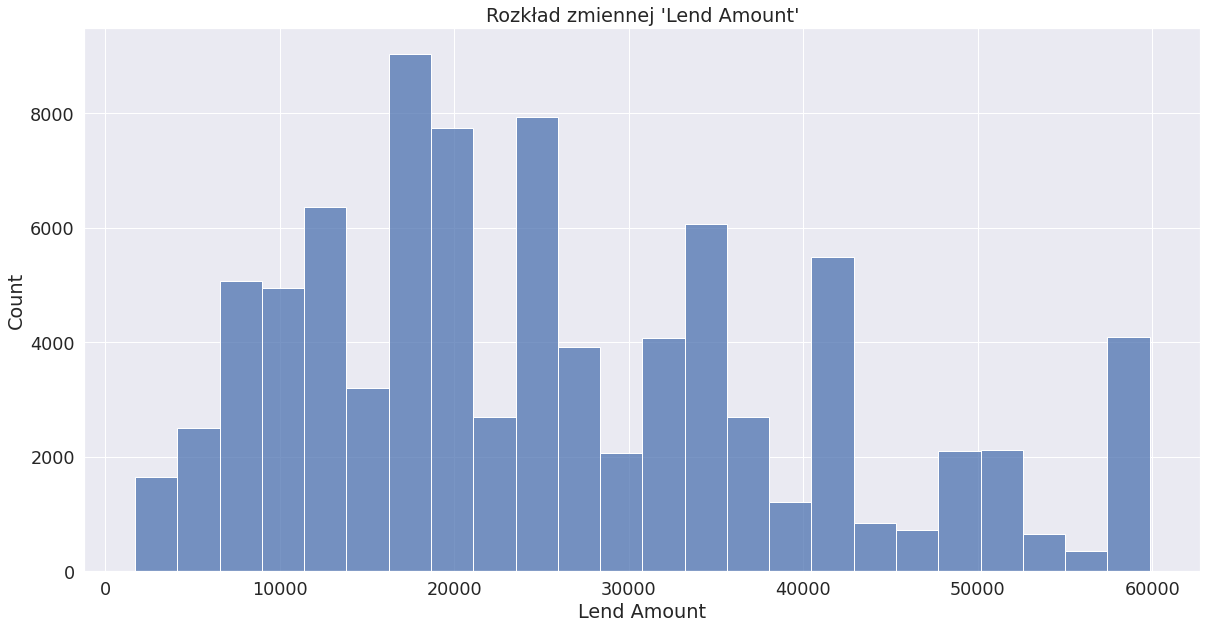

In [17]:
#   lend amount (histogram / violinplot)
sns.set(font_scale=1.6)
plt.figure(figsize=(20,10))
ax = sns.histplot(data=loan_data,
                  x='Lend_Amount',
                  element='bars',
                  bins=24)

ax.set(xlabel='Lend Amount', title='Rozkład zmiennej \'Lend Amount\'')

[Text(0.5, 0, 'Sub GGGrade'),
 Text(0.5, 1.0, "Liczba obserwacji zmiennej 'Sub GGGrade'")]

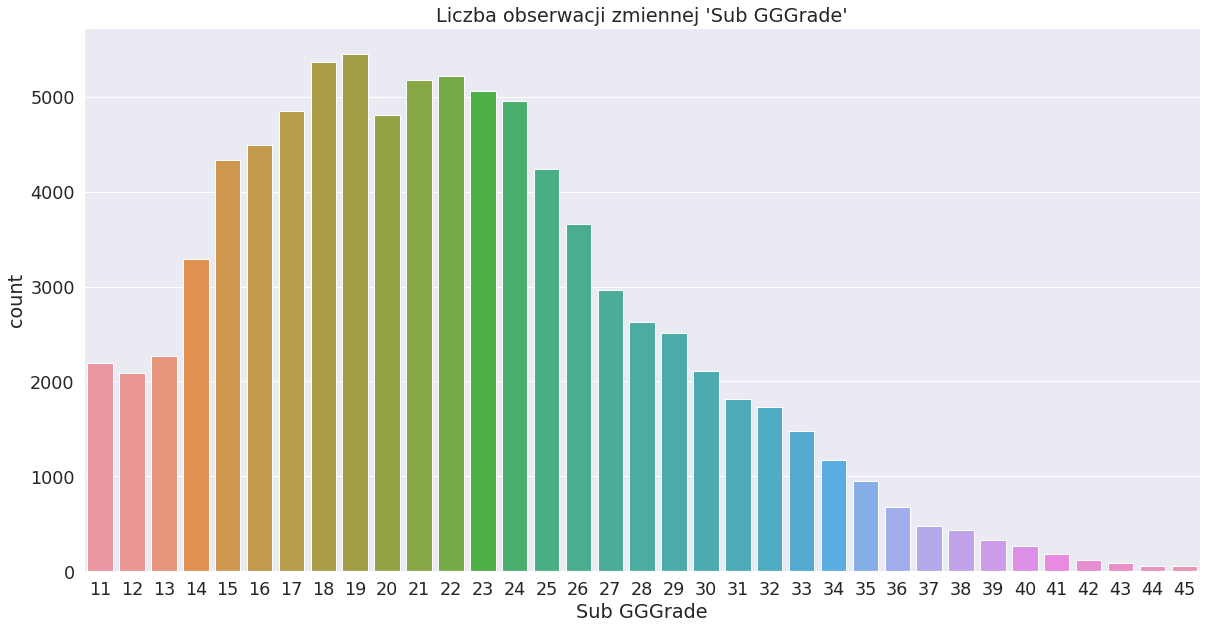

In [25]:
#subgggrade (histogram)

sns.set(font_scale=1.6)
plt.figure(figsize=(20,10))

ax = sns.countplot(data=loan_data, x='Sub_GGGrade',order=loan_data['Sub_GGGrade'].values.sort())

ax.set(xlabel='Sub GGGrade', title='Liczba obserwacji zmiennej \'Sub GGGrade\'')

[Text(0.5, 0, 'GGGrade'),
 Text(0.5, 1.0, "Liczba obserwacji zmiennej kategorycznej 'GGGrade' ")]

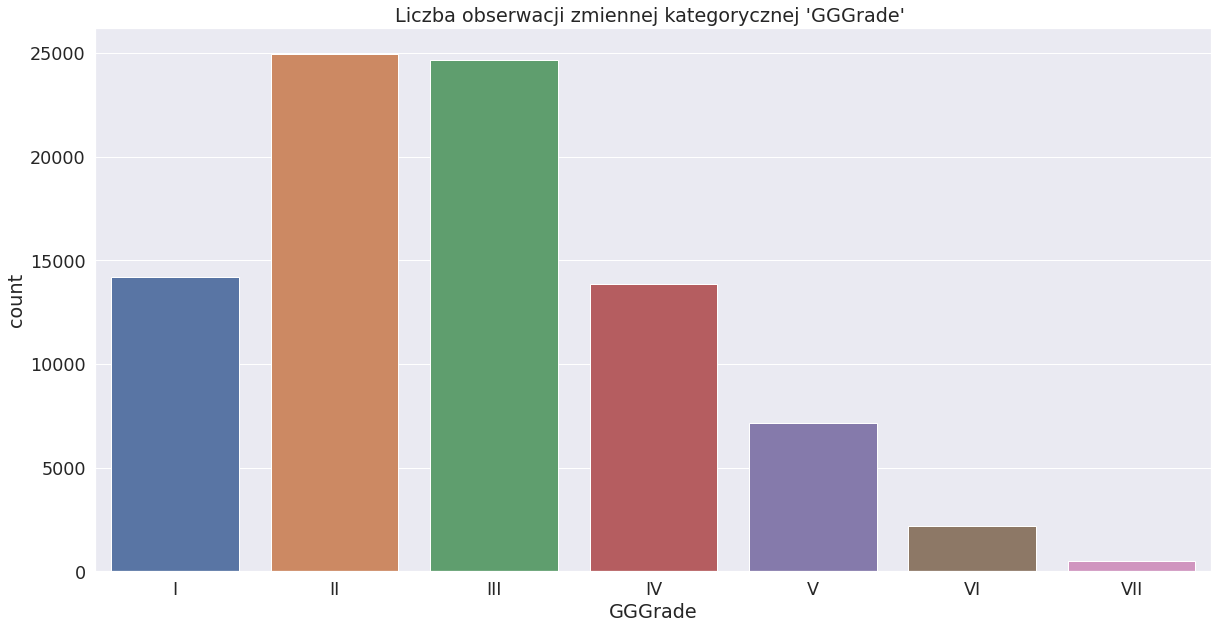

In [26]:
#   gggrage (barplot) + subgggrade (histogram)
sns.set(font_scale=1.6)
plt.figure(figsize=(20,10))

ax = sns.countplot(data=loan_data, x='GGGrade',order=loan_data['GGGrade'].values.sort())

ax.set(xlabel='GGGrade', title='Liczba obserwacji zmiennej kategorycznej \'GGGrade\' ')

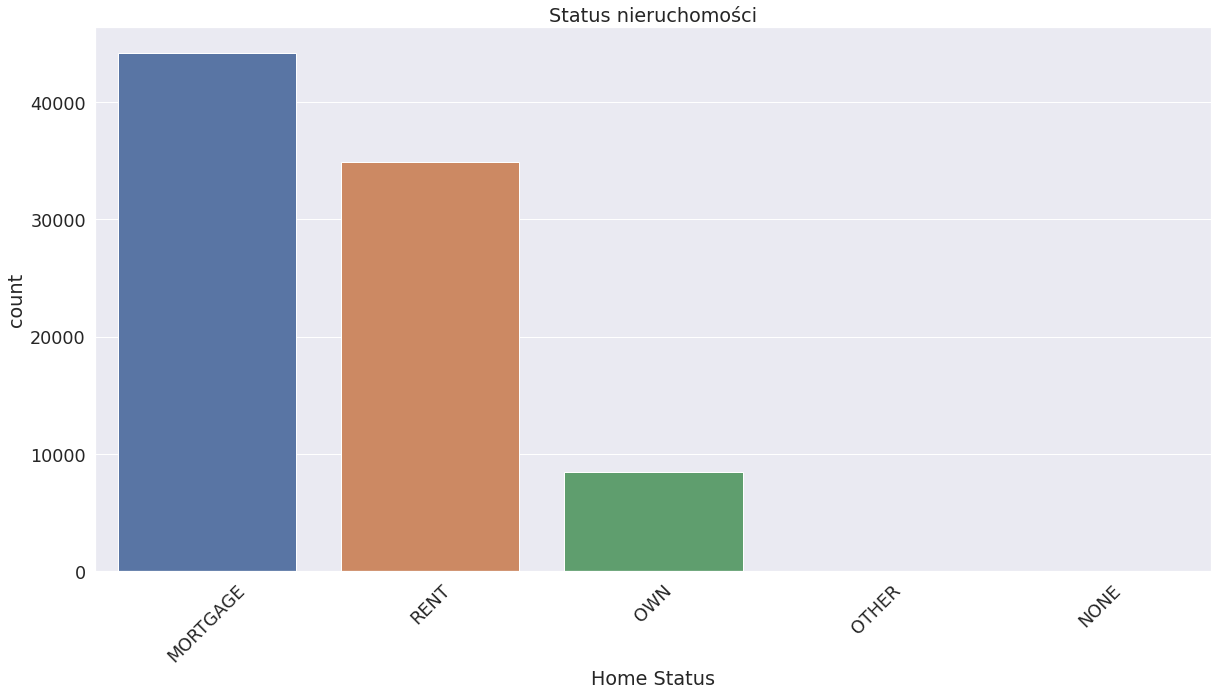

In [27]:
#   home status
sns.set(font_scale=1.6)
plt.figure(figsize=(20,10))

ax = sns.countplot(data=loan_data, x='Home_Status',order=loan_data['Home_Status'].value_counts().index)

ax.set(xlabel='Home Status', title='Status nieruchomości')
plot = plt.xticks(rotation=45)

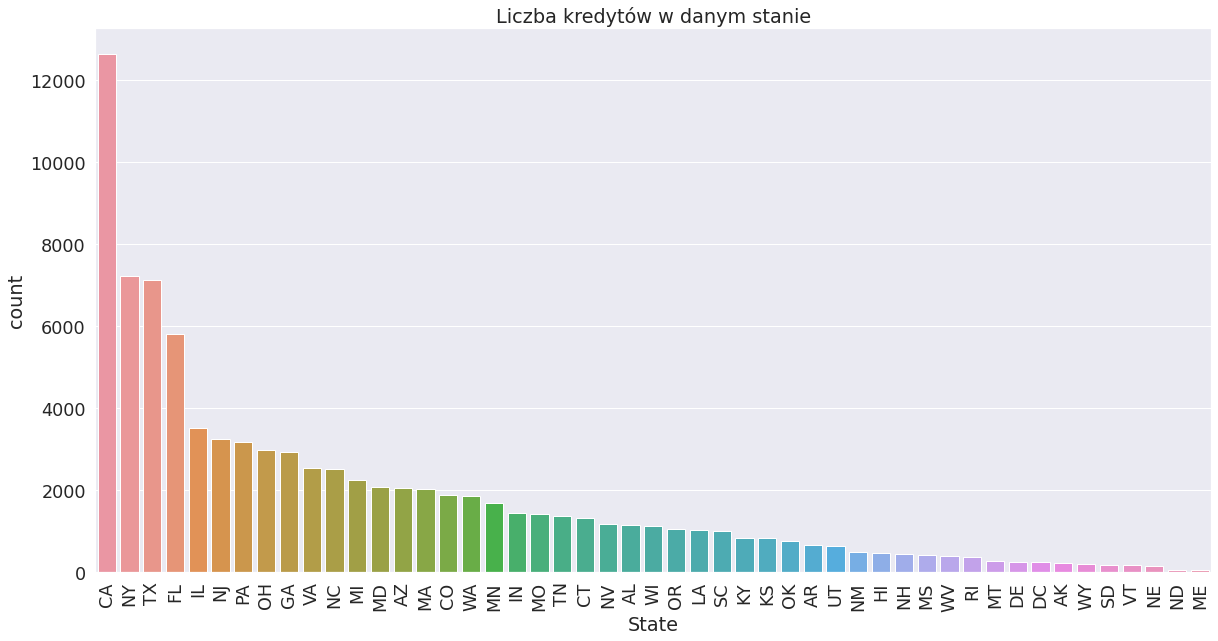

In [28]:
# state (barplot)

sns.set(font_scale=1.6)
plt.figure(figsize=(20,10))

ax = sns.countplot(data=loan_data, x='State',order=loan_data['State'].value_counts().index)

ax.set(xlabel='State', title='Liczba kredytów w danym stanie')
plot = plt.xticks(rotation=90)

[Text(0.5, 0, 'Duration'), Text(0.5, 1.0, "Rozkład zmiennej 'Duration'")]

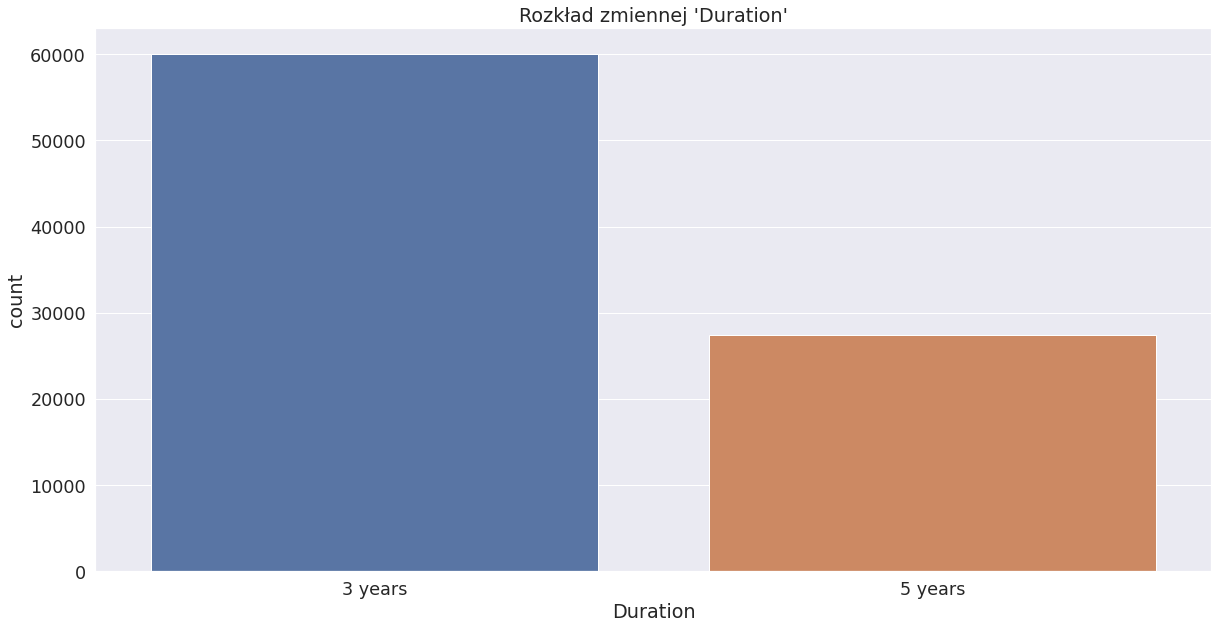

In [29]:
#duration
sns.set(font_scale=1.6)
plt.figure(figsize=(20,10))

ax = sns.countplot(data=loan_data, x='Duration')

ax.set(xlabel='Duration', title='Rozkład zmiennej \'Duration\'')

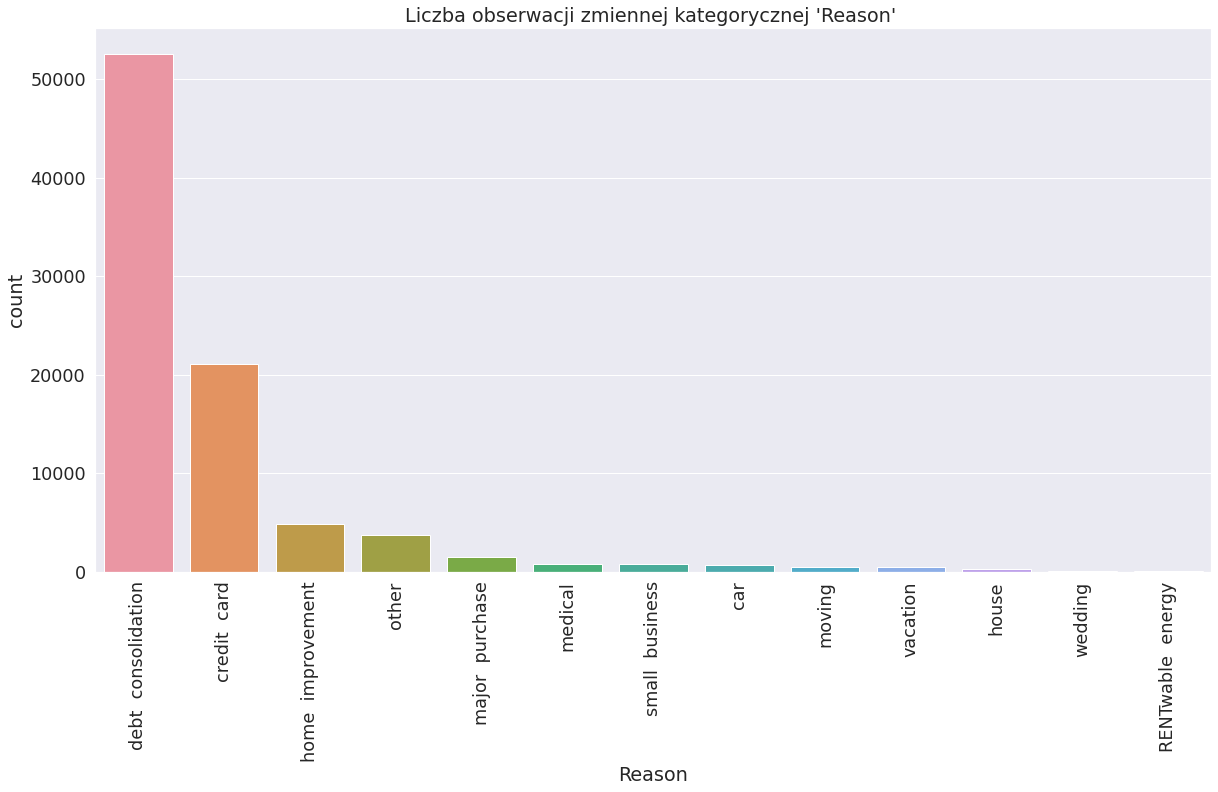

In [30]:
#reason
sns.set(font_scale=1.6)
plt.figure(figsize=(20,10))

ax = sns.countplot(data=loan_data, x='Reason',order=loan_data['Reason'].value_counts().index)

ax.set(xlabel='Reason', title='Liczba obserwacji zmiennej kategorycznej \'Reason\' ')
plot = plt.xticks(rotation=90)

[Text(0.5, 0, 'Yearly Income'),
 Text(0.5, 1.0, "Rozkład zmiennej 'Yearly Income'")]

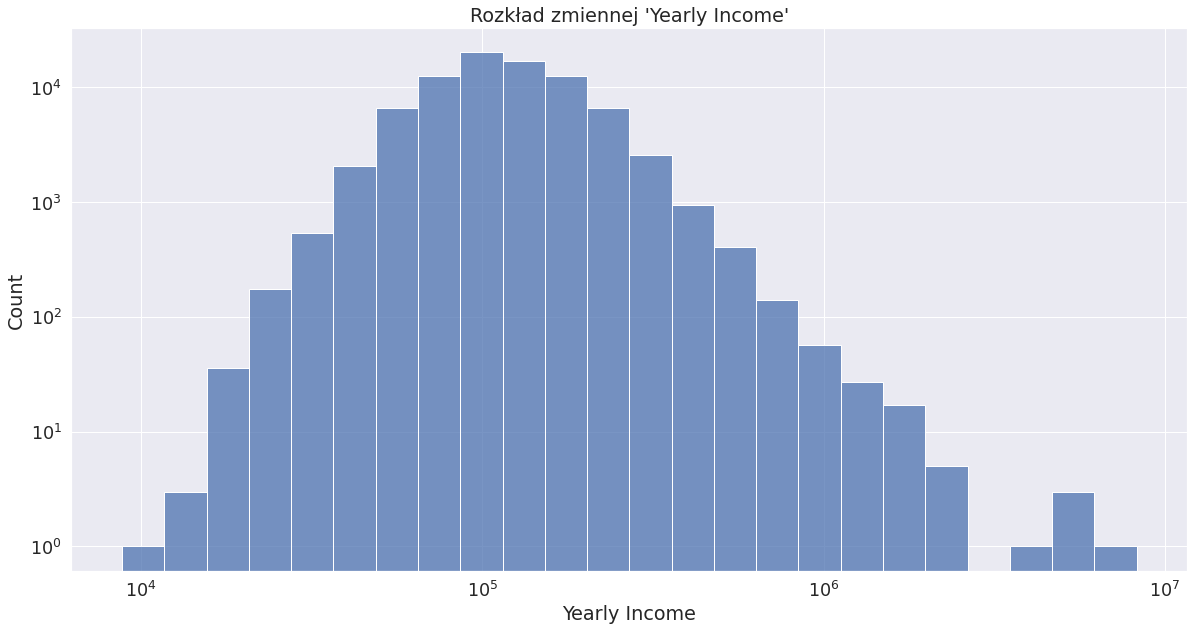

In [31]:
# Yearly Income Histogram
sns.set(font_scale=1.6)
plt.figure(figsize=(20,10))

ax = sns.histplot(data=loan_data,
                  x='Yearly_Income',
                  log_scale=(True, True),
                  element='bars',
                  bins=24)

ax.set(xlabel='Yearly Income', title='Rozkład zmiennej \'Yearly Income\'')

Na podstawie powyższych wykresów zaobserwować można następujące fakty:
- Wykres pokazujący liczbę pożyczek w danym stanie nie jest reprezentatywny dla całych stanów zjednoczonych, jest to zawężone jedynie to jednej firmy, która głównie działała w stanie California.
- Głównym powodem do zaciągnięcia pożyczki dla danej próbki jest konsolidacja długów.
- Duża część kredytobiorców posiada obecnie hipoteke. 
- Ze względu na jedynie dwie wartości w kolumnie 'Duration', możemy stwierdzić iż firma oferuje tylko te dwie opcje jako przewidywany czas spłacania pożyczki, gdzie popularniejszym okresem są 3 lata.
- Rzadkością jest, aby wniosek o pożyczkę złożyła osoba, której przychód roczny jest w okolicy 10,000\\$ lub większy niż 500,000$.
- Ilość pieniędzy udzielanych w pożyczce jest dość różnorodna, jednak przeważają ilości z przedziału 10,000\\$ - 30,000\\$.
- Większość wniosków o pożyczkę pochodzi od osób, których dochód roczny zbliżony do 100,000\\$.

### 5.2 Macierz korelacji

W celu zbadania zależności pomiędzy zmiennymi wygenerowano macierz korelacji. Problemem, który się tu pojawił jednak jest fakt, że bez żadnego przetworzenia danych kategorycznych, nie można ich uwzględnić w klasycznym badaniu korelacji. Z tego też powodu skorzystano z biblioteki *Dython*, która oferuje metodę pozwalającą na wygenerowanie macierzy korelacji danych mieszanych.

Funkcja wykorzystuje współczynnik korelacji Pearsona przy wyznaczaniu korelacji między zmiennymi numerycznymi, ze stosunku korelacyjnego w przypadku wyznaczania korelacji między zmienną kategoryczną i numeryczną oraz ze współczynnika V Cramera (lub współczynnika U Theila) przy wyznaczaniu korelacji między zmiennymi kategorycznymi.

<Figure size 1728x1152 with 0 Axes>

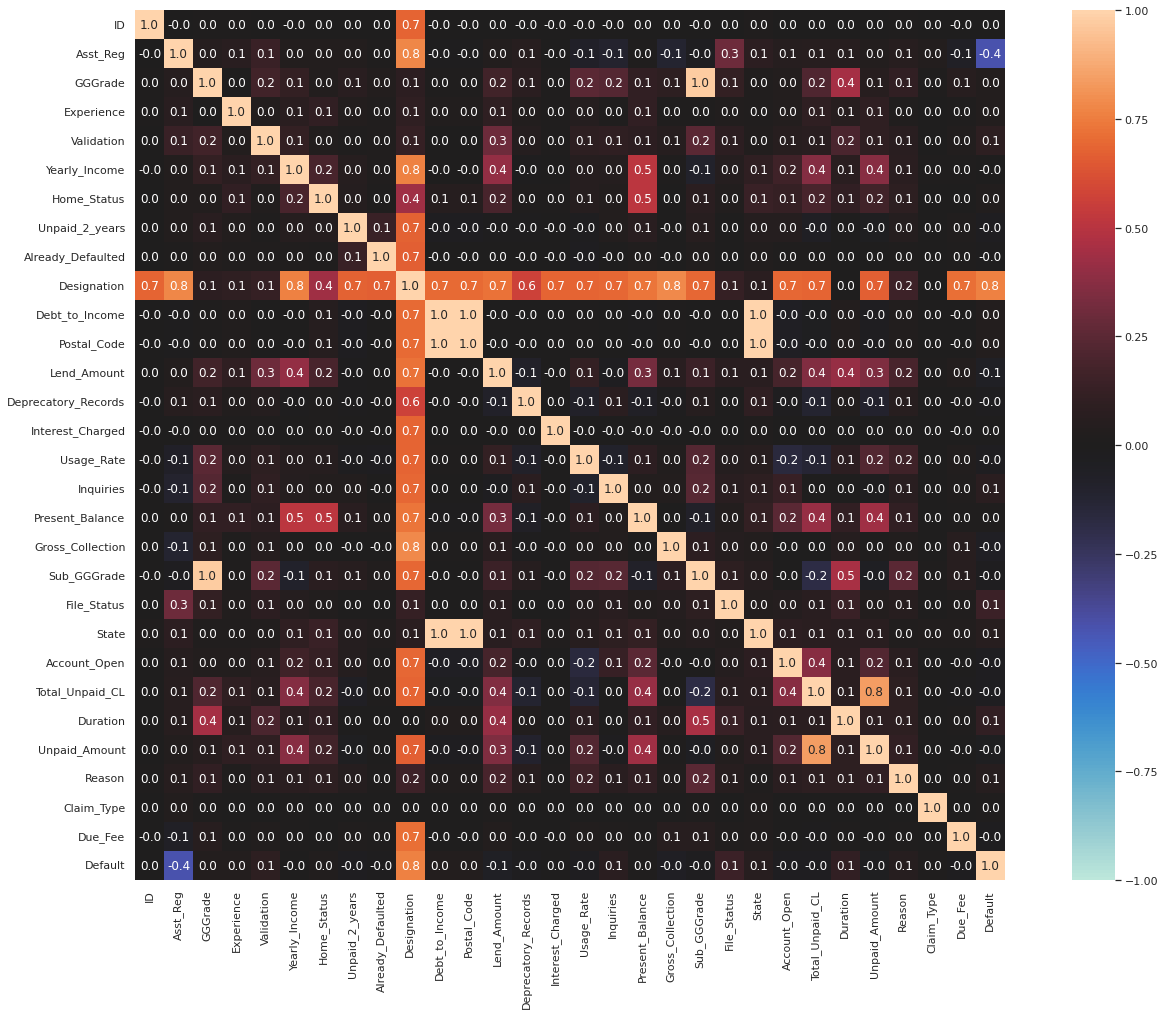

In [32]:
plt.figure(figsize=(24,16))
sns.set(font_scale=1)

corr_mat = associations(processed_loan_data, figsize=(24, 16), fmt='.1f')
df_complete_corr=corr_mat['corr']

/opt/python/envs/default/lib/python3.8/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


(-127.6146362, -64.0610978, 23.253819649999997, 50.628669349999996)

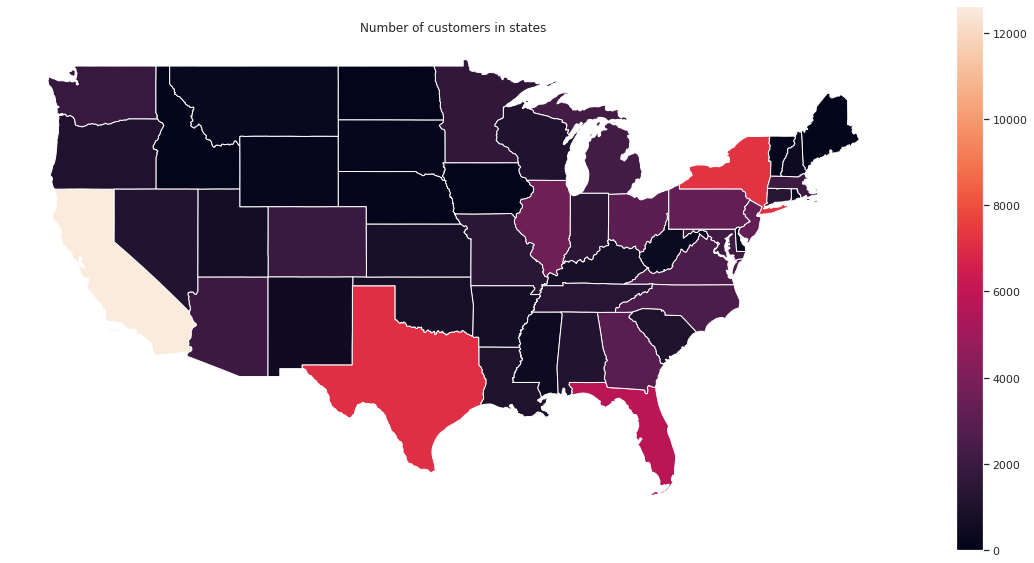

In [33]:

#   number of records by states (map)
usa_map = gpd.read_file('usa-states-census-2014.shp')
state_count = {}

for row in usa_map.iloc:
    state_count[row['NAME'].replace(' ','').lower()] = 0
    state_count[row['STUSPS'].lower()] = 0

for row in loan_data.iloc:
    try:
        state_count[row['State'].lower()] += 1
    except KeyError:
        continue
keys_list = list(state_count)
filtered_state_count = {}

for i in range(0, len(state_count), 2):
    filtered_state_count[keys_list[i + 1]] = max(
        state_count[keys_list[i]],
        state_count[keys_list[i + 1]]
    )

list_for_df = []

for row in usa_map.iloc:
    list_for_df.append(filtered_state_count[row['STUSPS'].lower()])
    
usa_map['CUSTOMER_COUNT'] = list_for_df
usa_ax = usa_map.plot(column='CUSTOMER_COUNT',
                      legend='True',
                      figsize=(20, 10))
usa_ax.set_title('Number of customers in states')
usa_ax.axis('off')

[Text(0.5, 0, 'Lend Amount'),
 Text(0, 0.5, 'Yearly Income'),
 Text(0.5, 1.0, 'Wartości pożyczki w zależności od Zarobków')]

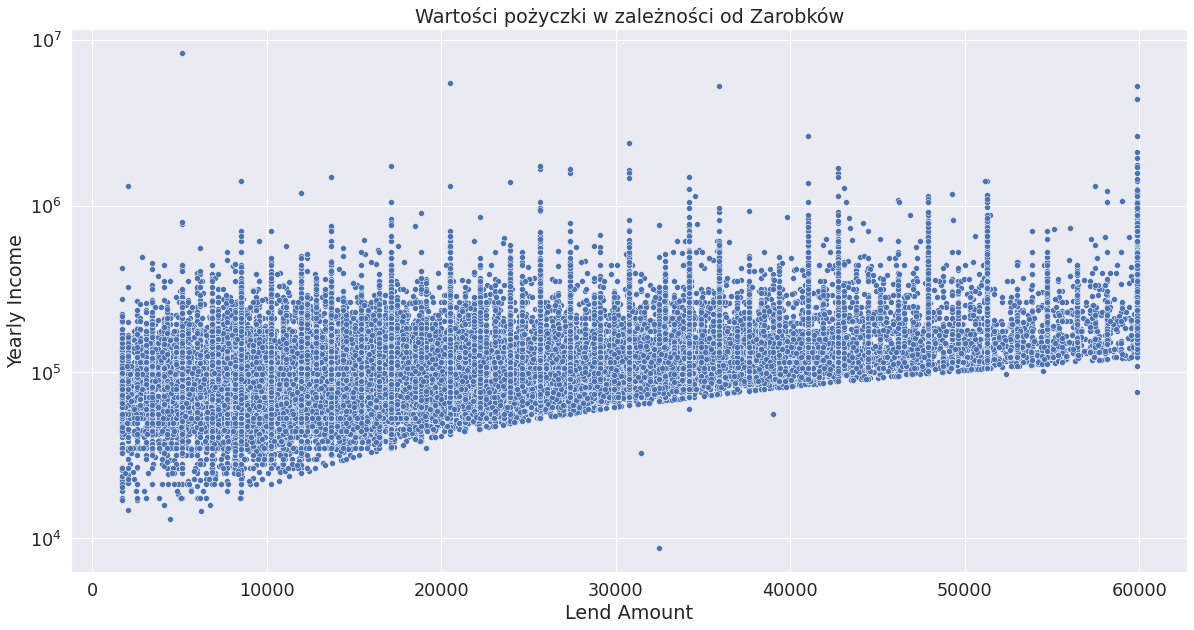

In [34]:
sns.set(font_scale=1.6)
plt.figure(figsize=(20,10))
ax = sns.scatterplot(data=loan_data, x="Lend_Amount", y="Yearly_Income")
plt.yscale('log')
ax.set(xlabel='Lend Amount', ylabel='Yearly Income', title='Wartości pożyczki w zależności od Zarobków')

[Text(0, 0.5, 'Lend Amount'),
 Text(0.5, 1.0, 'Średnia wartość pożyczki w zależności od okresu spłaty')]

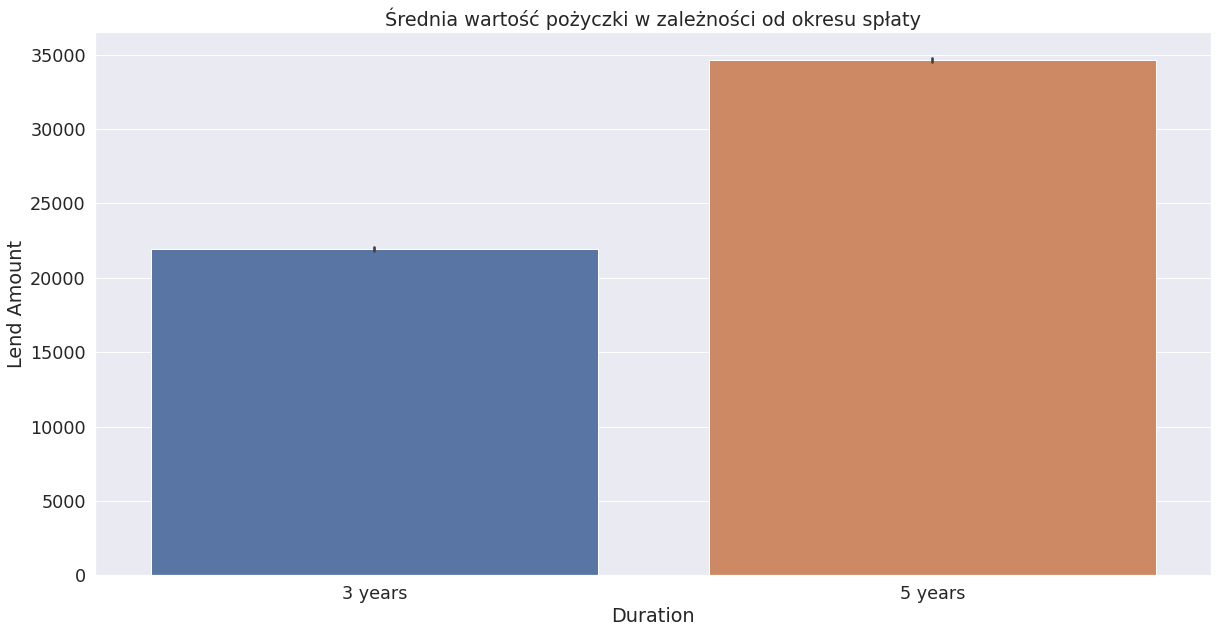

In [35]:
# Lend Amount vs Duration
sns.set(font_scale=1.6)
plt.figure(figsize=(20,10))

ax = sns.barplot(x="Duration",
                    y="Lend_Amount",
                    data=loan_data)

ax.set(ylabel='Lend Amount', title='Średnia wartość pożyczki w zależności od okresu spłaty')

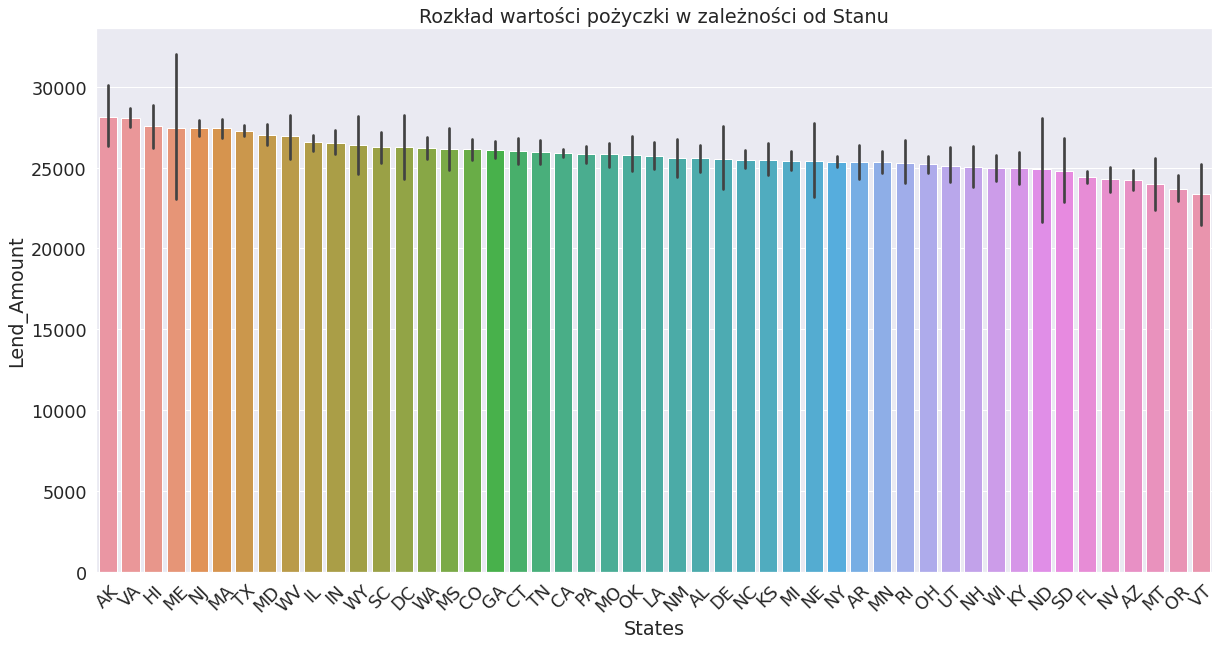

In [38]:
# lend amount by states
sns.set(font_scale=1.6)
plt.figure(figsize=(20,10))

means = pd.DataFrame(loan_data.groupby('State')['Lend_Amount'].mean()).sort_values(['Lend_Amount'], ascending=False).index

ax = sns.barplot(x="State", y="Lend_Amount", data=loan_data, order=means)

ax.set(xlabel='States', title='Rozkład wartości pożyczki w zależności od Stanu')
plot = plt.xticks(rotation=45)

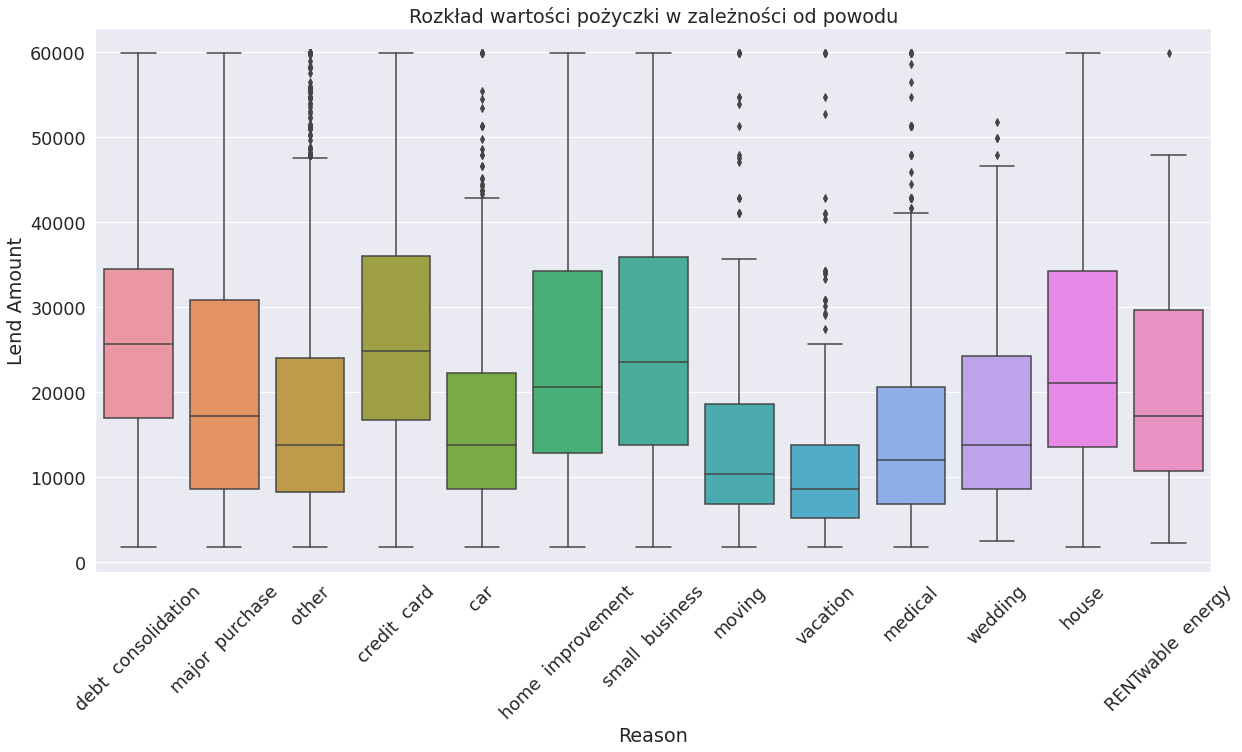

In [39]:
## Reason vs Lend Amount 
sns.set(font_scale=1.6)
plt.figure(figsize=(20,10))

ax = sns.boxplot(x="Reason",
                 y="Lend_Amount",
                 data=loan_data)

ax.set(xlabel='Reason', ylabel='Lend Amount', title='Rozkład wartości pożyczki w zależności od powodu')
plot = plt.xticks(rotation=45)

### 5.3 Obserwacje na temat zależności
- Na podstawie rozkładu wysokości pożyczek możemy stwierdzić, że najdroższym celem jest rozpoczęcie małego biznesu oraz zaraz po tym są konsolidacja długów, spłata karty kredytowej oraz dom i jego rozbudowa.
- Najniższą ząś wartość mają z reguły pożyczki na cele wakacyjne.
- Na podstawie wykresu wysokości pożyczek w zależności od czasu kredytowania, możemy stweirdzić że im dłuższy czas spłacania pożyczki tym kredyt jest większy, co jest dosyć intuicyjne.
- Na wykresie zależności pożyczonej kwoty i rocznego przychodu wyraźnie widać prostą (w przypadku wykresu krzywą, co jest spowodowane logarytmiczną skalą osi *Y*), powyżej której znajdują się prawie wszystkie próbki. Najprawdopodobniej oznacza to, że zazwyczaj pożyczkę dostać mogą osoby, które spełniają pewien próg stosunku pożyczonej sumy do rocznego przychodu.
- Analiza próbek, które nie znajdują się nad wspomnianą prostą nie wykazała żadnych nieprawidłowości, są to więc najprawdopodobniej pewne wyjątkowe przypadki
- Najwyższa średnia kwo.ta udzielonych pożyczek przypada na stan Alaska (AK), natomiast największa rozbieżność w wartości udzielanych pożyczek występuje w stanie Maine (ME).

## 6. One Hot Encoding

W celu realizacji zadania klasyfikacji, postawionego w projekcie, zdecydowano się na zakodowanie zmiennych kategorycznych, korzystając z oferowanej przez bibliotekę *Pandas* metody *get_dummies()*.

W pierwszej kolejności jednak postanowiono nie zawierac kolumny 'Designation' w dalszej analizie, ponieważ zawiera ona aż 38,353 wartości nominalnych, które w większości nie niosą ze sobą informacji pozwalającej na poprawną klasyfikację.

In [38]:
loan_data_for_ohe = processed_loan_data.drop('Designation', axis=1)
non_num_no_des = [val for val in non_numeric_columns if val != 'Designation']

ohe_nominal_df = pd.get_dummies(loan_data_for_ohe[non_num_no_des])

loan_data_after_ohe = loan_data_for_ohe[numeric_columns]
loan_data_after_ohe = loan_data_after_ohe.join(ohe_nominal_df)

## 7. Implementacje modeli

Przed implementacją jakiegokolwiek podelu postanowiono znormalizować kolumny zbioru danych, zawierające zmienne numeryczne. Zdecydowano się na to ponieważ w danych występuje bardzo duża rozbieżność wartości, niektóre kolumny zawierają liczby rzędu tysięcy, a inne nie wykraczają wartościami poza liczby jednocyfrowe. Dodatkowo usunięto kolumnę 'ID', ponieważ jest to kolumna zawierająca identyfikatory wierszy, więc nie niesie ze sobą informacji pozwalających na wykonanie zadania klasyfikacji.

In [39]:
x_to_scale = loan_data_after_ohe
y = processed_loan_data['Default']

scaler = Normalizer()
x_scaled = scaler.fit_transform(x_to_scale[numeric_columns])

x = x_to_scale
x[numeric_columns] = x_scaled
x = x.drop(['ID', 'Default'], axis=1)


### 7.1 Wielowarstwowy Perceptron (MLP)

Pierwszym zaimplementowanym w ramach projektu, klasyfikatorem był wielowarstwowy perceptron składający się z dwóch wastw ukrytych mających odpowiednio 16 oraz 9 neuronów. W celu zbadania jego efektywności, a także efektywności modeli zaimplementowanych później użyto metody *RepeatedStratifiedKFold()* z bilbioteki *Scikit-Learn*.

In [42]:
rsfk = RepeatedStratifiedKFold(n_repeats=1, n_splits=5, random_state=576)

In [43]:
mlp = MLPClassifier(hidden_layer_sizes=(16, 9),
                    random_state=144,
                    verbose=True,
                    max_iter=500)

metrics_used = ['balanced_accuracy', 'f1', 'precision', 'recall']

scores = cross_validate(mlp, x, y, scoring=metrics_used, cv=rsfk, n_jobs=1)

Iteration 1, loss = 0.46032198
Iteration 2, loss = 0.40964848
Iteration 3, loss = 0.40390224
Iteration 4, loss = 0.39986716
Iteration 5, loss = 0.39719799
Iteration 6, loss = 0.39551792
Iteration 7, loss = 0.39326883
Iteration 8, loss = 0.39167501
Iteration 9, loss = 0.39029788
Iteration 10, loss = 0.38948104
Iteration 11, loss = 0.38872952
Iteration 12, loss = 0.38786377
Iteration 13, loss = 0.38714588
Iteration 14, loss = 0.38639365
Iteration 15, loss = 0.38559659
Iteration 16, loss = 0.38512389
Iteration 17, loss = 0.38470283
Iteration 18, loss = 0.38431844
Iteration 19, loss = 0.38341025
Iteration 20, loss = 0.38318663
Iteration 21, loss = 0.38283867
Iteration 22, loss = 0.38204782
Iteration 23, loss = 0.38143781
Iteration 24, loss = 0.38132162
Iteration 25, loss = 0.38112953
Iteration 26, loss = 0.38032997
Iteration 27, loss = 0.38060520
Iteration 28, loss = 0.38002653
Iteration 29, loss = 0.38006964
Iteration 30, loss = 0.37935499
Iteration 31, loss = 0.37927520
Iteration 32, los

In [51]:
print(f'Metryki modelu wyznaczone przez kroswalidację dla modelu MLP (bez SMOTE):\n')

for i, met in enumerate(metrics_used):
    if i == 0:
        print('Dokładność (accuracy):')
    elif i == 1:
        print('Wskaźnik f1 (f1 score):')
    elif i == 2:
        print('Precyzja (precision):')
    elif i == 3:
        print('Zwrot (recall):')

    key = f'test_{met}'

    print(f'Średnia: {np.mean(scores[key]):.2f}')
    print(f'Wartość minimalna: {np.min(scores[key]):.2f}')
    print(f'Wartość maksymalna: {np.max(scores[key]):.2f}')
    print(f'Odchylenie standardowe: {np.std(scores[key]):.2f}\n')

Metryki modelu wyznaczone przez kroswalidację dla modelu MLP (bez SMOTE):

Dokładność (accuracy):
Średnia: 0.79
Wartość minimalna: 0.66
Wartość maksymalna: 0.87
Odchylenie standardowe: 0.09

Wskaźnik f1 (f1 score):
Średnia: 0.79
Wartość minimalna: 0.67
Wartość maksymalna: 0.86
Odchylenie standardowe: 0.08

Precyzja (precision):
Średnia: 0.81
Wartość minimalna: 0.66
Wartość maksymalna: 0.91
Odchylenie standardowe: 0.11

Zwrot (recall):
Średnia: 0.77
Wartość minimalna: 0.68
Wartość maksymalna: 0.85
Odchylenie standardowe: 0.07



Mimo tego, że model osiągnął średnią dokładność w okolicach 80%, to z pozostałych metryk wywnioskować można, że MLP nie jest najlepszą metodą do rozwiązania postawionego problemu, głównie z powodu niezbilansowanych ilościowo klas. Algorytm "uczy się" zakładać, że wyjście zawsze jest równe 0 i przez fakt, że około 80% rekordów zawiera 0 w klasyfikowanej kolumnie, algorytm osiąga podobną wartość dokładności.

Z tego też powodu postanowiono zaimplementować inne modele, aby spróbować polepszyć proces klasyfikacji i porównać ich efektywność do modelu wielowarstwowego perceptronu. Dodatkowo, w celu rozwiązania problemu niezbilansowanych ilości klas, postanowiono użyć metody *SMOTE* oferowanej przez bibliotekę *Imbalanced-learn*. 

In [56]:
print(f"Liczba rekordów, przed użyciem metody SMOTE, gdzie 'Default' = 0: {y.value_counts().iloc[0]}")
print(f"Liczba rekordów, przed użyciem metody SMOTE, gdzie 'Default' = 1: {y.value_counts().iloc[1]}\n")

sm = SMOTE(random_state=123)

x_res, y_res = sm.fit_resample(x, y)

print(f"Liczba rekordów, po użyciu metody SMOTE, gdzie 'Default' = 0: {y_res.value_counts().iloc[0]}")
print(f"Liczba rekordów, po użyciu metody SMOTE, gdzie 'Default' = 1: {y_res.value_counts().iloc[1]}")

Liczba rekordów, przed użyciem metody SMOTE, gdzie 'Default' = 0: 65984
Liczba rekordów, przed użyciem metody SMOTE, gdzie 'Default' = 1: 15367

Liczba rekordów, po użyciu metody SMOTE, gdzie 'Default' = 0: 65984
Liczba rekordów, po użyciu metody SMOTE, gdzie 'Default' = 1: 65984


### 7.2 Drzewo decyzyjne


In [57]:
rsfk = RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=576)

decision_tree = DecisionTreeClassifier(criterion='entropy')
scores = cross_validate(decision_tree, x_res, y_res, scoring=metrics_used, cv=rsfk, n_jobs=1)

In [58]:
print(f'Metryki modelu wyznaczone przez kroswalidację dla modelu drzewa decyzyjnego:\n')

for i, met in enumerate(metrics_used):
    if i == 0:
        print('Dokładność (accuracy):')
    elif i == 1:
        print('Wskaźnik f1 (f1 score):')
    elif i == 2:
        print('Precyzja (precision):')
    elif i == 3:
        print('Zwrot (recall):')

    key = f'test_{met}'

    print(f'Średnia: {np.mean(scores[key]):.2f}')
    print(f'Wartość minimalna: {np.min(scores[key]):.2f}')
    print(f'Wartość maksymalna: {np.max(scores[key]):.2f}')
    print(f'Odchylenie standardowe: {np.std(scores[key]):.2f}\n')

Metryki modelu wyznaczone przez kroswalidację dla modelu drzewa decyzyjnego:

Dokładność (accuracy):
Średnia: 0.77
Wartość minimalna: 0.77
Wartość maksymalna: 0.78
Odchylenie standardowe: 0.00

Wskaźnik f1 (f1 score):
Średnia: 0.78
Wartość minimalna: 0.77
Wartość maksymalna: 0.78
Odchylenie standardowe: 0.00

Precyzja (precision):
Średnia: 0.76
Wartość minimalna: 0.76
Wartość maksymalna: 0.77
Odchylenie standardowe: 0.00

Zwrot (recall):
Średnia: 0.80
Wartość minimalna: 0.79
Wartość maksymalna: 0.80
Odchylenie standardowe: 0.00



### 7.3 Regresja logistyczna

In [59]:
logit = LogisticRegression(solver='saga', verbose=True, penalty='l2', C=0.5, max_iter=300)
scores = cross_validate(logit, x_res, y_res, scoring=metrics_used, cv=rsfk, n_jobs=1)

convergence after 63 epochs took 16 seconds
convergence after 62 epochs took 21 seconds
convergence after 62 epochs took 48 seconds
convergence after 63 epochs took 43 seconds
convergence after 62 epochs took 42 seconds
convergence after 63 epochs took 42 seconds
convergence after 63 epochs took 27 seconds
convergence after 62 epochs took 15 seconds
convergence after 62 epochs took 15 seconds
convergence after 62 epochs took 15 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   47.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   43.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   42.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   42.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [60]:
print(f'Metryki modelu wyznaczone przez kroswalidację dla modelu regresji logistycznej:\n')

for i, met in enumerate(metrics_used):
    if i == 0:
        print('Dokładność (accuracy):')
    elif i == 1:
        print('Wskaźnik f1 (f1 score):')
    elif i == 2:
        print('Precyzja (precision):')
    elif i == 3:
        print('Zwrot (recall):')

    key = f'test_{met}'

    print(f'Średnia: {np.mean(scores[key]):.2f}')
    print(f'Wartość minimalna: {np.min(scores[key]):.2f}')
    print(f'Wartość maksymalna: {np.max(scores[key]):.2f}')
    print(f'Odchylenie standardowe: {np.std(scores[key]):.2f}\n')

Metryki modelu wyznaczone przez kroswalidację dla modelu regresji logistycznej:

Dokładność (accuracy):
Średnia: 0.86
Wartość minimalna: 0.86
Wartość maksymalna: 0.87
Odchylenie standardowe: 0.00

Wskaźnik f1 (f1 score):
Średnia: 0.85
Wartość minimalna: 0.85
Wartość maksymalna: 0.86
Odchylenie standardowe: 0.00

Precyzja (precision):
Średnia: 0.92
Wartość minimalna: 0.92
Wartość maksymalna: 0.93
Odchylenie standardowe: 0.00

Zwrot (recall):
Średnia: 0.79
Wartość minimalna: 0.79
Wartość maksymalna: 0.80
Odchylenie standardowe: 0.00



### 7.4 K-Najbliższych Sąsiadów

In [61]:
knn = KNeighborsClassifier(n_neighbors=50)
scores = cross_validate(knn, x_res, y_res, scoring=metrics_used, cv=rsfk, n_jobs=1)

In [62]:
print(f'Metryki modelu wyznaczone przez kroswalidację dla modelu K najbliższych sąsiadów:\n')

for i, met in enumerate(metrics_used):
    if i == 0:
        print('Dokładność (accuracy):')
    elif i == 1:
        print('Wskaźnik f1 (f1 score):')
    elif i == 2:
        print('Precyzja (precision):')
    elif i == 3:
        print('Zwrot (recall):')

    key = f'test_{met}'

    print(f'Średnia: {np.mean(scores[key]):.2f}')
    print(f'Wartość minimalna: {np.min(scores[key]):.2f}')
    print(f'Wartość maksymalna: {np.max(scores[key]):.2f}')
    print(f'Odchylenie standardowe: {np.std(scores[key]):.2f}\n')

Metryki modelu wyznaczone przez kroswalidację dla modelu K najbliższych sąsiadów:

Dokładność (accuracy):
Średnia: 0.63
Wartość minimalna: 0.63
Wartość maksymalna: 0.63
Odchylenie standardowe: 0.00

Wskaźnik f1 (f1 score):
Średnia: 0.70
Wartość minimalna: 0.70
Wartość maksymalna: 0.71
Odchylenie standardowe: 0.00

Precyzja (precision):
Średnia: 0.59
Wartość minimalna: 0.58
Wartość maksymalna: 0.59
Odchylenie standardowe: 0.00

Zwrot (recall):
Średnia: 0.88
Wartość minimalna: 0.87
Wartość maksymalna: 0.89
Odchylenie standardowe: 0.00



### 7.5 Wyniki skuteczności zaimplementowanych algorytmów

|                       | Zbilansowana Dokładność | Wskaźnik f1 | Precyzja | Zwrot |
|-----------------------|-------------------------|-------------|----------|-------|
|MLP                    | 62%                     | 38%         | 62%      | 28%   |
|Drzewo decyzyjne       | 77%                     | 78%         | 76%      | 80%   |
|Regresja Logistyczna   | 86%                     | 85%         | 92%      | 79%   |
|K-Najbliższych Sąsiadów| 63%                     | 70%         | 59%      | 88%   |

## 8. Wnioski

- Mimo brakujących danych w niektórych kolumnach, użyty zbiór danych jest na tyle duży, aby wyznaczyć z niego zależność pomiędzy zmienną odpowiedzialną za wypłacalność, a pozostałymi zmiennymi.
- Brakujące wartości mogą być zastąpione pewnymi aproksymacjami, za pomocą imputacji.
- Ze zbioru wywnioskować można wiele obserwacji oraz zależności.
- Pierwszy model, jaki zaimplementowano sprawdzał się raczej źle. Przez to że około 80% rekordów było przypisanych do klasy 0 zmiennej 'Default', model poprzez predykcję wartości 0 na wyjściu osiągał około 80% skuteczności.
- W sytuacjach niezbilansowanej liczności klas, dobrze sprawdza się metoda SMOTE, pozwala ona na wygenerowanie dodatkowych rekordów należących do mniej licznej klasy, na podstawie tych, ze zbioru oryginalnego.
- Po wykonaniu kroswalidacji na wszystkich modelach, najleszym z zaimplementowanych okazała sie Regresja Logistyczna, ze zbilansowaną dokładnością na poziomie 86% i wskaźnikiem *f1* wynoszącym 85%.
- Na uwagę zasługuje także metoda K-Najbliższych Sąsiadów, która mimo, że nie była zbyt dokładna, to osiągnęła zadziwiająco wysoką wartość Zwrotu, 88%.
- Uzyskane wyniki zapewne nie są optymalne i najprawdopodobniej istnieje możliwość, że poprzez optymalizację hiperparametrów da się uzyskać modele o lepszej skuteczności